# Assignment 6.1

Name: Subhabrata (Suvo) Ganguli

Date: Feb 13, 2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


(a)  Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.


The code and result for the scatterplot are shown below.

Prediction Equation: TimeM = 0.87 * TimeW -2.83


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the data
url = "http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat"
data = pd.read_csv(url, sep="\s+")

# see data head
print(data.head())

               race  distance  climb   timeM   timeW
0        AnTeallach      10.6  1.062   74.68   89.72
1      ArrocharAlps      25.0  2.400  187.32  222.03
2  BaddinsgillRound      16.4  0.650   87.18  102.48
3          BeinnLee      10.2  0.260   41.58   52.52
4        BeinnRatha      12.0  0.240   47.75   58.78


Text(0.5, 1.0, "Men's vs Women's Time")

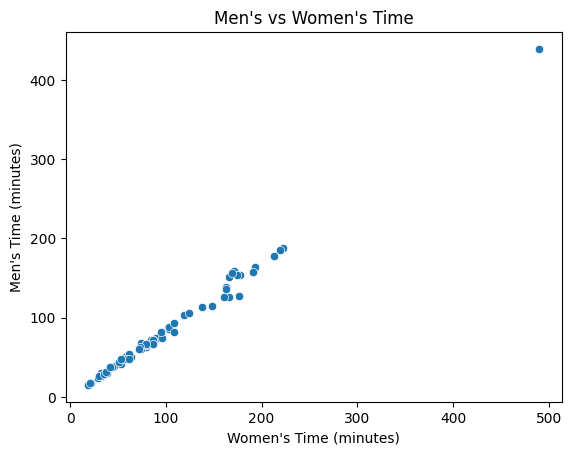

In [3]:
# Scatterplot
sns.scatterplot(x="timeW", y="timeM", data=data)
plt.xlabel("Women's Time (minutes)")
plt.ylabel("Men's Time (minutes)")
plt.title("Men's vs Women's Time")

In [4]:
# Linear Regression
# Fit linear regression model
x = data[["timeW"]].values
y = data["timeM"].values
model = LinearRegression()
model.fit(x, y)

# Prediction
intercept = model.intercept_
slope = model.coef_[0]

print("Intercept = %.2f" % intercept)
print("Slope = %.2f" % slope)

# Predict men's record time for the Highland Fling
timeW = 490.05
timeM_pred = model.predict([[timeW]])
print("Men's record time (predicted): %.2f minutes" %timeM_pred[0])


Intercept = -2.83
Slope = 0.87
Men's record time (predicted): 423.94 minutes


(b) Find and interpret the correlation.

The correlation is 0.99587.

Since the correlation is almost 1, it indicates a strong positive linear relationship. Thus, as women's record times increase, men's record times also increase proportionally.

In [5]:
# import library
import numpy as np

# correlation
correlation = np.corrcoef(data['timeW'], data['timeM'])[0, 1]
print("Correlation = %.5f" %correlation)


Correlation = 0.99587


(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

Adding the constraint lead to a less positive linear relationship as compared to the case where there is an intercept.

In [6]:
# linear regression
model = LinearRegression(fit_intercept=False)
model.fit(x, y)

# Get the estimated slope (beta)
slope = model.coef_
print("Beta = ", slope)

Beta =  [0.85227434]


## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.

Code and result for scatterplot are shown below.

The outliers can be constructed as:
- 'firearms' > 20 or 'deaths' > 6, and
- 'firearms' <=80 or 'deaths' < 25

In [7]:
# read data

data = pd.read_csv("Firearms.dat", delimiter=r"\s+")
data.head()

,Nation,deaths,firearms
0,Austria,1.8,30
1,Belgium,2.9,17
2,Canada,5.1,31
3,Denmark,2.2,12
4,Finland,2.6,45


Text(0.5, 1.0, 'Scatterplot of Firearms vs Death')

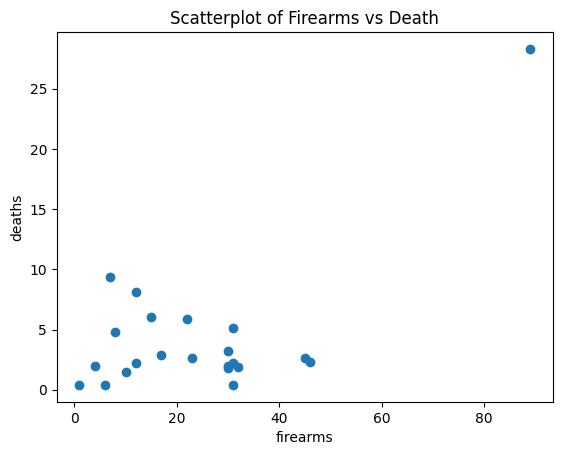

In [8]:
# scatterplot
plt.figure()
plt.scatter(data['firearms'], data['deaths'])
plt.xlabel('firearms')
plt.ylabel('deaths')
plt.title('Scatterplot of Firearms vs Death')

(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

The code and result for correlation between firearms and deaths with and without outliers are given below. For outliers we consider the values ot firearnms > 20 and < 80 or value of deaths > 6 and < 25.

The correlation coefficient with outliers is 0.6344 and without outliers is 0.9836. This indicates that the regression without outlier has a strong correlation between firearms and deaths. Whereas the correlation coefficient with outliers has a weaker correlation between firearms and deaths.

Correlation with outlier: 0.6344
Correlation without outlier: 0.9836


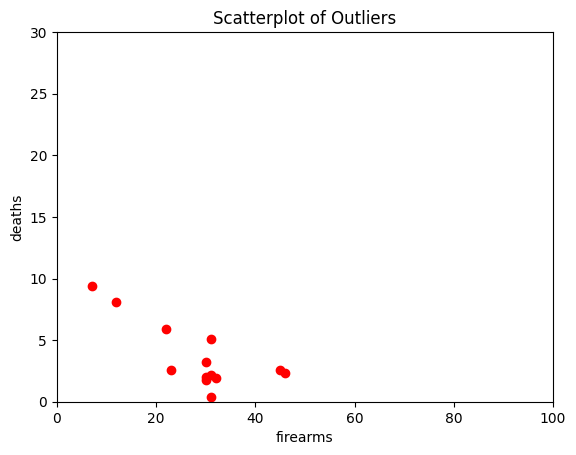

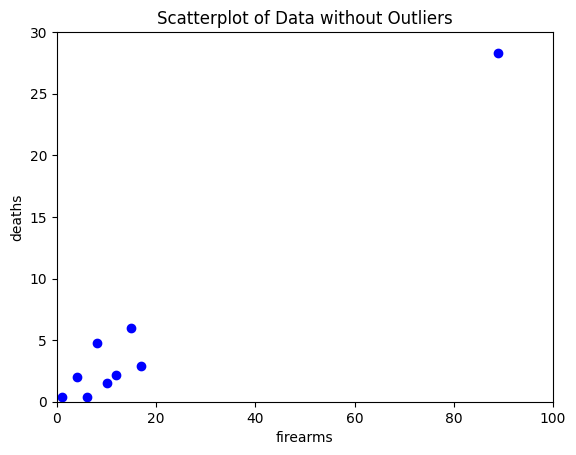

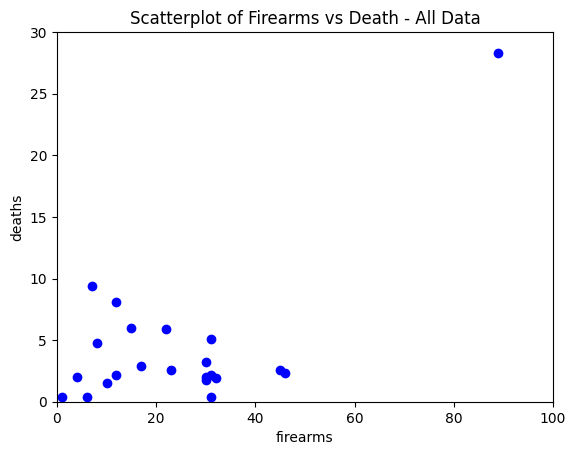

In [9]:
# outliers
outliers_1 = data[(data['firearms'] > 20) | (data['deaths'] > 6)]
outliers =  outliers_1[(outliers_1['firearms'] <= 80) | (outliers_1['deaths'] <= 25)]
plt.figure()
plt.scatter(outliers['firearms'], outliers['deaths'], color='red')
plt.xlim([0,100])
plt.ylim([0,30])
plt.xlabel('firearms')
plt.ylabel('deaths')
plt.title('Scatterplot of Outliers')

# data without outliers
data_no_outliers = data[((data['firearms'] <= 20) & (data['deaths'] <= 6)) | ((data['firearms'] >= 80) & (data['deaths'] >= 25))]
plt.figure()
plt.scatter(data_no_outliers['firearms'], data_no_outliers['deaths'], color='blue')
plt.xlim([0,100])
plt.ylim([0,30])
plt.xlabel('firearms')
plt.ylabel('deaths')
plt.title('Scatterplot of Data without Outliers')

# data with outliers
plt.figure()
plt.scatter(data['firearms'], data['deaths'], color='blue')
plt.xlim([0,100])
plt.ylim([0,30])
plt.xlabel('firearms')
plt.ylabel('deaths')
plt.title('Scatterplot of Firearms vs Death - All Data')

# Correlation - outlier
corr_outlier = data['firearms'].corr(data['deaths'])

# Data without outliers
data_no_outlier = data[((data['firearms'] <= 20) & (data['deaths'] <= 6)) | ((data['firearms'] >= 80) & (data['deaths'] >= 25))]

# Calculate correlation without outlier
corr_no_outlier = data_no_outlier['firearms'].corr(data_no_outlier['deaths'])

print("Correlation with outlier: %.4f" % corr_outlier)
print("Correlation without outlier: %.4f" % corr_no_outlier)

(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

See code and results below for linear regression model with and without the outlying observation.

Prediction Equation (with outliers): y = -0.27 + 0.19\*x

Prediction Equation (without outliers): y = -0.35 + 0.32\*x

Note that the intercept changes from -0.27 to -0.35 and the slope changes from 0.19 to 0.32. These are significantly different.

In [10]:
# Create and fit the model - with outliers
X = data[['firearms']]
y = data['deaths']

model = LinearRegression()
model.fit(X, y)

coeff = model.coef_[0]
intercept = model.intercept_

print(f"Prediction Equation (with outliers): y = {intercept:.2f} + {coeff:.2f}*x")

X = data_no_outlier[['firearms']]
y = data_no_outlier['deaths']

model = LinearRegression()
model.fit(X, y)

coeff = model.coef_[0]
intercept = model.intercept_

print(f"Prediction Equation (without outliers): y = {intercept:.2f} + {coeff:.2f}*x")

Prediction Equation (with outliers): y = -0.27 + 0.19*x
Prediction Equation (without outliers): y = -0.35 + 0.32*x


## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat 

(a) Construct the two scatterplots shown in Figure 6.3.

Code and results for the two scatterplots are shown below.

In [11]:
# Load the data
url = "http://stat4ds.rwth-aachen.de/data/Covid19.dat"
data = pd.read_csv(url, sep="\s+")

# see data head
print(data.head())

   day  cases
0    1     16
1    2     24
2    3     30
3    4     53
4    5     80


Text(0.5, 1.0, 'Scatterplot of Logarithm(Number of Cases) vs Day')

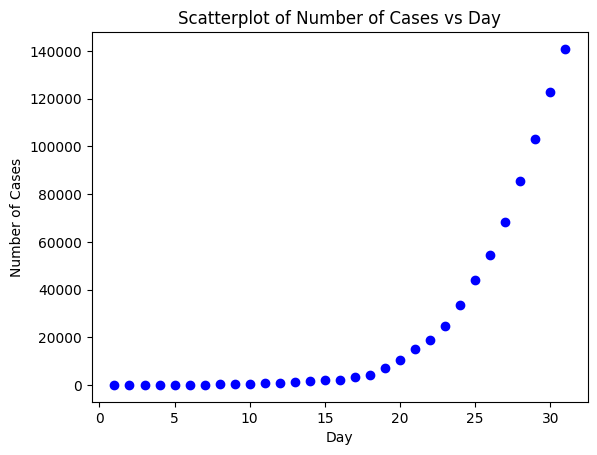

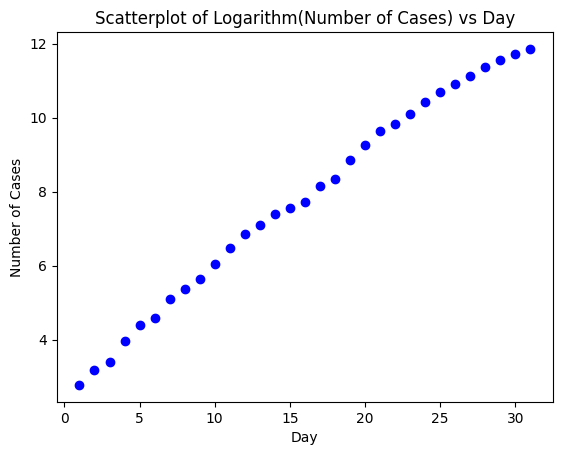

In [12]:
# import library
import numpy as np

plt.figure()
plt.scatter(data['day'], data['cases'], color='blue')
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.title('Scatterplot of Number of Cases vs Day')

plt.figure()
plt.scatter(data['day'], np.log(data['cases']), color='blue')
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.title('Scatterplot of Logarithm(Number of Cases) vs Day')

(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

Correlation between Day and Cases = 0.7937

Correlation between Day and Logarithm(Cases) = 0.9968

The fact that the correlation between days and log(cases) is almost 1 indicates that there is a very strong positive correlation between days and log(cases). The correlation between days and cases is 0.79 indicates that comparatively there is a not a strong positive correlation between days and cases.

In [13]:
corr_cases = data['day'].corr(data['cases'])
corr_log_cases = data['day'].corr(np.log(data['cases']))

print("Correlation between Day and Cases = %.4f" % corr_cases)
print("Correlation between Day and Logarithm(Cases) = %.4f" % corr_log_cases)

Correlation between Day and Cases = 0.7937
Correlation between Day and Logarithm(Cases) = 0.9968


(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

Prediction Equation: log(y) = 0.3088 * day + 2.8439

We calculate the prediction for day x = 1. Then we calculate the prediction at day x + 1 and product of prediction at day x and exp(beta1). The values are:
- Predicted number of cases at day x + 1: 336272.44
- Predicted number of cases at day x: 246932.40

The ratio is 1.36 as shown by the code below.

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the Covid19 data
data_url = "http://stat4ds.rwth-aachen.de/data/Covid19.dat"
covid_data = pd.read_csv(data_url, delim_whitespace=True)

# Get X and y
X = np.array(covid_data['day']).reshape(-1,1)
y = covid_data['cases']

# Find log
y_log = np.log(y)

# linear regression
model = LinearRegression()
model.fit(X, y_log)

# Print the coefficient and prediction equation
print("Prediction equation: log(y) = {:.4f} * day + {:.4f}".format(model.coef_[0], model.intercept_))

# Calculate the predicted count at day x + 1
case_x_plus_1 = np.exp(model.predict([[X.max() + 1]]))
case_x = np.exp(model.predict([[X.max()]]))
ratio = case_x_plus_1 / case_x

# Comparison
print("Predicted number of cases at day x + 1: %.2f" % case_x_plus_1[0])
print("Predicted number of cases at day x: %.2f" % case_x[0])
print("Ratio: %.2f" % ratio[0])


Prediction equation: log(y) = 0.3088 * day + 2.8439
Predicted number of cases at day x + 1: 336272.44
Predicted number of cases at day x: 246932.40
Ratio: 1.36


## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

Simpson's paradox here means that as education increases, the crime rate also increases. This is counter-intuitive.

With the independent variable as "education" only - (a) intercept = 50.85 (b) coefficient for HS = 1.486. Here the slope of HS is 1.486 > 0. This means there is a positive correlation.

With the independent variables as "education" and "urbanization" - (a) intercept = 59.1181 (b) slope for HS = -0.5834 (c) slope for Urban  0.6835. Here the slope of HS is < 0 - which makes sense.

The reason for the Simpson's paradox can be explained by the scatterplot Figure 6.5 in the textbook. We see that if we do linear regression with the urban and rural data separately, we get negative slope for education, which makes sense. However, when we take the full dataset, due to the specific distribution, we get a positive slope for education for the linear regression. That is why the interpretation becomes counterintuitive.


In [15]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data
url = "http://stat4ds.rwth-aachen.de/data/Florida.dat"
data = pd.read_csv(url, sep="\s+")

# see data head
print(data.head())

     County  Crime  Income    HS  Urban
0   ALACHUA    104    22.1  82.7   73.2
1     BAKER     20    25.8  64.1   21.5
2       BAY     64    24.7  74.7   85.0
3  BRADFORD     50    24.6  65.0   23.2
4   BREVARD     64    30.5  82.3   91.9


In [16]:
# with R-style formulas
res = smf.ols("Crime ~ HS", data = data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     18.12
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           6.81e-05
Time:                        14:53:52   Log-Likelihood:                -310.05
No. Observations:                  67   AIC:                             624.1
Df Residuals:                      65   BIC:                             628.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.8569     24.451     -2.080      0.041     -99.688      -2.026
HS             1.4860      0.349      4.257      0.000       0.789       2.183
==============================================================================
Omnibus:                        4.854   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.181
Skew:                           0.601   Prob(JB):                        0.124
Kurtosis:                       3.225   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# with R-style formulas
res = smf.ols("Crime ~ HS + Urban", data = data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.38e-09
Time:                        14:53:52   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.1181     28.365      2.084      0.041       2.452     115.784
HS            -0.5834      0.472     -1.235      0.221      -1.527       0.360
Urban          0.6825      0.123      5.539      0.000       0.436       0.929
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.252
Skew:                           0.543   Prob(JB):                        0.119
Kurtosis:                       2.414   Cond. No.                         997.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

See code and results below for the scatterplot.

The aggregate is calculated as data['Crime'] + data['HS'] + data['Urban']

After the analysis we have:
- Correlation for Education vs Crime = 0.7926
- Correlation for Aggregate vs Crime = 0.6939

Thus, we see that the correlation between the aggregate data and income is much weaker compared to the correlation between education and income. 

Correlation for Education vs Crime = 0.4669
Correlation for Aggregate vs Crime = 0.8713


Text(0.5, 1.0, 'Scatterplot of Aggregate vs Crime. Correlation = 0.87')

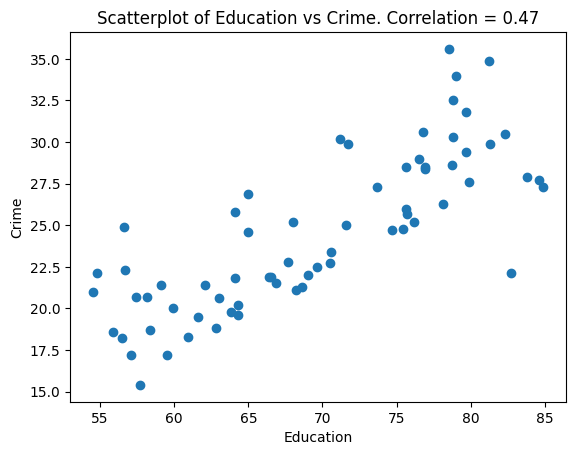

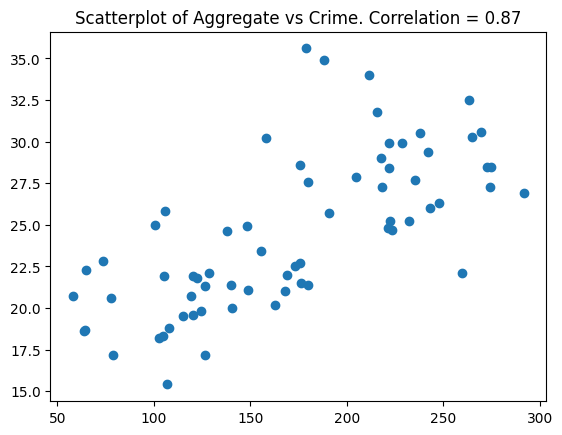

In [18]:
corr = data['HS'].corr(data['Crime'])
print(f"Correlation for Education vs Crime = {corr:.4f}")

plt.figure()
plt.scatter(data['HS'], data['Income'])
plt.xlabel('Education')
plt.ylabel('Crime')
plt.title(f"Scatterplot of Education vs Crime. Correlation = {corr:.2f}")

data['Aggregate'] = data['Crime'] + data['HS'] + data['Urban']
corr_aggregate = data['Aggregate'].corr(data['Crime'])
print(f"Correlation for Aggregate vs Crime = {corr_aggregate:.4f}")

plt.figure()
plt.scatter(data['Aggregate'], data['Income'])
plt.title(f"Scatterplot of Aggregate vs Crime. Correlation = {corr_aggregate:.2f}")


(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

No, it is not sensible to use the least squares line for predicting y outside the range used for linear regression.

Below, we construct a true relation as y_true = a + b*x^2. Using the data points (54.5, 21.0) and (84.9, 27.3), we solve for a and b. We get a = 16.5843 and b = 0.0015.

See below the equations for the linear regression line and the true line.

- Predicted y for x = 0 from linear regression line = -4.60
- Predicted y for x = 0 from true line = 16.58

Thus, the predicted value fron the linear regression line and the true equation are quite differen.

The scatter plot, the linear regression line and the line for the true equation are plotted below.

Min Education = 54.5
Max Education = 84.9
y_pred for x = 0 (linear regression): -4.60
x1 = 54.50, x2 = 84.90
x1_chk = 54.50, x2_chk = 84.90
y1_chk = 21.00, y2_chk = 27.30
a = 16.5843, b = 0.0015
Equation: y_true (true) = 16.5843 + 0.0015*x
y_pred for x = 0: 16.58


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


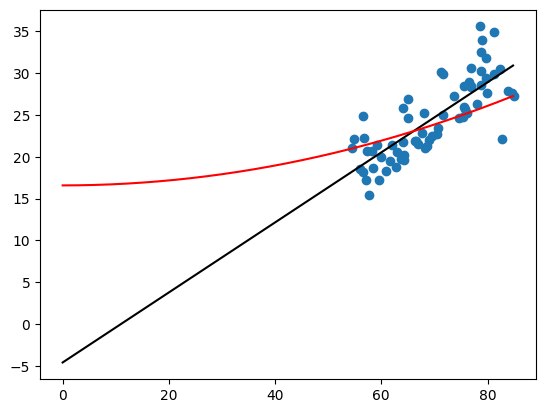

In [19]:
# min and max edu
edu_min = np.min(data['HS'])
print(f"Min Education = {edu_min:.1f}")
edu_max = np.max(data['HS'])
print(f"Max Education = {edu_max:.1f}")

# get X and y
X = data[['HS']]
y = data['Income']

# linear regression
model = LinearRegression()
model.fit(X,y)

# Prediction
y_pred = model.predict([[0]])
print(f"y_pred for x = 0 (linear regression): {y_pred[0]:.2f}")

# true equation: y = a + b*x^2
x1 = 54.5
x2 = 84.9

for i in range(0,len(data)):
    x = data.iloc[i, 3]
    if x == x1:
        y1 = data['Income'][i]
        i1 = i
    if x == x2:
        y2 = data['Income'][i]
        i2 = i

x1_chk = data['HS'][i1]
x2_chk = data['HS'][i2]
y1_chk = data['Income'][i1]
y2_chk = data['Income'][i2]

# print x1 and x2
print(f"x1 = {x1:.2f}, x2 = {x2:.2f}")
print(f"x1_chk = {x1_chk:.2f}, x2_chk = {x2_chk:.2f}")
print(f"y1_chk = {y1_chk:.2f}, y2_chk = {y2_chk:.2f}")

# solve for a and b
b = (y2 - y1) / (x2**2 - x1**2)
a = y1 - b * x1**2

# print coefficients and equation
print(f"a = {a:.4f}, b = {b:.4f}")
print(f"Equation: y_true (true) = {a:.4f} + {b:.4f}*x")

# y_pred for x = 0
y_pred_x0 = a + b*0**2
print(f"y_pred for x = 0: {y_pred_x0:.2f}")

# scatter plot
plt.figure()
plt.scatter(data['HS'], data['Income'])

# create vectors for the linear regression line and the true equation line
xvec = np.array(np.arange(0, 84.9, 0.1)).reshape(-1,1)
yvec_pred = model.predict(xvec)
yvec_true = a + b*xvec**2

# plot the linear regression line and the true equation line
plt.plot(xvec, yvec_pred, 'black', xvec, yvec_true, 'red')

## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

Prediction equation:
cogpa_pred = 2.82 + 0.21 x hsgpa + 0.00 x tv - 0.01xsport

The p-values are follows:
- p-value for constant = 0.0000
- p-value for hsgpa = 0.0439
- p-value for tv = 0.6291
- p-value for sport = 0.2303

Since the p-values for the constant and hsgpa are < 0.05, we can reject the null hypothesis that there is sufficient evidence to suggest a relationship between the predictor variables (constant and hsgpa) and the response variable.

Since the p-values for the tv and sport are > 0.05, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest a relationship between the predictor variables (tv and sport) and the response variable.

The summary of the conclusions for rejection/fail-to-reject for null hyothesis are as follows:
- Reject null hypothesis for constant
- Reject null hypothesis for hsgpa
- Fail to reject null hypothesis for tv
- Fail to reject null hypothesis for sport

In [21]:
# import library
import statsmodels.api as sm
import warnings

data = pd.read_csv("Students.csv")

# predictor and response
X = data[['hsgpa','tv','sport']]
y = data['cogpa']

# linear regression
model = LinearRegression()
model.fit(X,y)

# Prediction equation
print(f"Prediction equation:")
print(f"cogpa_pred = {model.intercept_:.2f} + {model.coef_[0]:.2f}*hsgpa + {model.coef_[1]:.2f}*tv + {model.coef_[2]:.2f}*sport")
print("")

# Add constant
X = sm.add_constant(X)

# OLS
ols_model = sm.OLS(y, X)

# result and p-values
results = ols_model.fit()
p_values = results.pvalues

# print p-values
print("Summary of p-values:")
print(p_values)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #print(f"p-value for constant = {p_values[0]:.4f}")
    #print(f"p-value for hsgpa = {p_values[1]:.4f}")
    #print(f"p-value for tv = {p_values[2]:.4f}")
    #print(f"p-value for sport = {p_values[3]:.4f}")

    # draw conclusions
    if p_values[0] < 0.05:
        print("Reject null hypothesis for constant")
    else:
        print("Fail to reject null hypothesis for constant")
    
    if p_values[1] < 0.05:
        print("Reject null hypothesis for hsgpa")
    else:
        print("Fail to reject null hypothesis for hsgpa")
    
    if p_values[2] < 0.05:
        print("Reject null hypothesis for tv")
    else:
        print("Fail to reject null hypothesis for tv")
    
    if p_values[3] < 0.05:
        print("Reject null hypothesis for sport")
    else:
        print("Fail to reject null hypothesis for sport")
    

Prediction equation:
cogpa_pred = 2.82 + 0.21*hsgpa + 0.00*tv + -0.01*sport

Summary of p-values:
const    2.862880e-10
hsgpa    4.391478e-02
tv       6.290793e-01
sport    2.303431e-01
dtype: float64
Reject null hypothesis for constant
Reject null hypothesis for hsgpa
Fail to reject null hypothesis for tv
Fail to reject null hypothesis for sport


(b)  Summarize the estimated effect of *hsgpa.*

In the prediction equation, the coefficient for hsgpa = 0.21. Thus, hsgpa affects the cogpa to some extent. 

This is also suggested by the p_value which is 0.0439 and is < 0.05. Thus, we reject the hypothesis and conclude that there is sufficient evidence to support that there is significant evidence of a relationship between hsgpa and cogpa.

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

The R-squared value = 0.105

The adjusted R-squared value = 0.057

An R-squared value of 0.105 indicates that approximately 10.5% of the variance in the dependent variable (cogpa, college GPA) is explained by the independent variables (hsgpa, tv, sport). While the R-squared value provides information about the goodness of fit of the linear regression model, an R-squared value of 0.105 suggests that the model has limited explanatory power and may not be very effective in predicting college GPA based on the given predictors.

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Tue, 13 Feb 2024   Prob (F-statistic):              0.101
Time:                        14:54:27   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8154      0.368      7.655      0.000       2.079       3.552
hsgpa          0.2088      0.101      2.061      0.044       0.006       0.412
tv             0.0033      0.007      0.486      0.629      -0.010       0.017
sport         -0.0141      0.012     -1.213      0.230      -0.037       0.009
==============================================================================
Omnibus:                        3.507   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.919
Skew:                          -0.148   Prob(JB):                        0.383
Kurtosis:                       2.175   Cond. No.                         97.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.


If the coefficient are all zero, then the p-value is 1.0. Thus, we reject the hypothesis that there is sufficient evidence to suggest that there is a significant evidence of a relationship between the predictor variables (hsgpa, tv, sport) and the response variable (cogpa).

(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

See code and results below.

In [24]:
# predictors
X = data[['hsgpa','tv','sport']]
y = data['cogpa']

X = sm.add_constant(X)

# regression
ols_model = sm.OLS(y, X)
results = ols_model.fit()

# significance level
alpha = 0.05

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # p-value for hsgpa
    p_value_hsgpa = results.pvalues[1]
    print(f"p-value for hsgpa: {p_value_hsgpa:.4f}")
    print("")

    if p_value_hsgpa < alpha:
        print("Reject the null hypothesis. There is sufficient evidence of effect of hsgpa on cogpa")
    else:
        print("Fail to reject the null hypothesis. There is insufficient evidence of effect of hsgpa on cogpa")


p-value for hsgpa: 0.0439

Reject the null hypothesis. There is sufficient evidence of effect of hsgpa on cogpa


(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

See code and results below.

Here, since we are interested in the effect of the three predictor variables only, we don't add the constant for X.

The p-value for hsgpa:
- p_value_hsgpa = 0.0000

Here is our conclusion if we use the Bonferroni approach:
- Significant effect of hsgpa at the alpha = 0.05, alpha_bonferroni = 0.0167 level

This is because the p-values is less than 0.0167 for hsgpa.

In [25]:
# predictors
X = data[['hsgpa','tv','sport']]
y = data['cogpa']

#X = sm.add_constant(X)

# regression
ols_model = sm.OLS(y, X)
results = ols_model.fit()

# significance level
alpha = 0.05
alpha_bon = alpha / 3

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # p-values excluding intercept
    p_value_hsgpa = results.pvalues[0]
    p_value_tv = results.pvalues[1]
    p_value_sport = results.pvalues[2]

    print(f"p_value_hsgpa = {p_value_hsgpa:.4f}")
    print(f"p_value_tv = {p_value_tv:.4f}")
    print(f"p_value_sport = {p_value_sport:.4f}")
    
    if p_value_hsgpa <= alpha_bon:
        print(f"Significant effect of hsgpa at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")
    else:
        print(f"Not significant effect of hsgpa at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")

    if p_value_tv <= alpha_bon:
        print(f"Significant effect of tv at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")
    else:
        print(f"Not significant effect of tv at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")

    if p_value_sport <= alpha_bon:
        print(f"Significant effect of sport at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")
    else:
        print(f"Not significant effect of sport at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")

p_value_hsgpa = 0.0000
p_value_tv = 0.0138
p_value_sport = 0.4448
Significant effect of hsgpa at the alpha = 0.05, alpha_bonferroni = 0.0167 level
Significant effect of tv at the alpha = 0.05, alpha_bonferroni = 0.0167 level
Not significant effect of sport at the alpha = 0.05, alpha_bonferroni = 0.0167 level


(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

The p-values are:
- p_value_tv = 0.0138
- p_value_sport = 0.4448

Here is our conclusion if we use the Bonferroni approach:
- Significant effect of tv at the alpha = 0.05, alpha_bonferroni = 0.0167 level
- Not significant effect of sport at the alpha = 0.05, alpha_bonferroni = 0.0167 level

This is because the p-value is less than 0.0167 for tv, and is greater than 0.0167 for sport.

In [26]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # p-values excluding intercept
    p_value_hsgpa = results.pvalues[0]
    p_value_tv = results.pvalues[1]
    p_value_sport = results.pvalues[2]

    # print results
    print(f"p_value_tv = {p_value_tv:.4f}")
    print(f"p_value_sport = {p_value_sport:.4f}")

    # draw conclusion
    if p_value_tv <= alpha_bon:
        print(f"Significant effect of tv at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")
    else:
        print(f"Not significant effect of tv at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")

    if p_value_sport <= alpha_bon:
        print(f"Significant effect of sport at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")
    else:
        print(f"Not significant effect of sport at the alpha = 0.05, alpha_bonferroni = {alpha_bon:.4f} level")

p_value_tv = 0.0138
p_value_sport = 0.4448
Significant effect of tv at the alpha = 0.05, alpha_bonferroni = 0.0167 level
Not significant effect of sport at the alpha = 0.05, alpha_bonferroni = 0.0167 level


## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

The Nation data is categorical. When I do one-hot-encoding for that, the adjusted R-squared is coming out to be nan. This is because the calculations encountered a large condition number.

So, for further analysis, I dropped the Nation column.

The adjusted R-squared with only GDP column is slightly lower than if we use all columns. This is due to the fact that all the other predictor variables are highly correlated with GDP and they are not providing additional information.

The OLS results summary shows that the coefficients for HDI and GII is much greater than that of GDP (even considering a scale factor of 10 between HDO, GII vs GDP). However, it is not the case when only GDP is used. The coefficients for the two cases are:
- GDP coefficient with all columns = 0.4066
- HDI coefficient with all columns = 68.79
- GII coefficient with all columsn = -68.38
- GDP coefficient with only GDP column = 2.1455.
  
This is because the HDI and GDII are highly correlated with the response variable "Internet" (coefficients are 68.79 and -68.38), whereas the correlation between GDP and Internet are comparatively not that strong (0.4066). This can be also concluded from the standard error which shows that the value for the case of using all columns is greater than when using just GDP.


In [27]:
# read data
df = pd.read_csv("UN.dat", delimiter=r"\s+")
df.head()

,Nation,GDP,HDI,GII,Fertility,CO2,Homicide,Prison,Internet
0,Algeria,12.8,0.72,0.42,2.8,3.2,0.8,162,17
1,Argentina,14.7,0.81,0.38,2.2,4.7,5.5,147,60
2,Australia,42.3,0.93,0.11,1.9,16.5,1.1,130,83
3,Austria,43.1,0.88,0.06,1.4,7.8,0.8,98,81
4,Belgium,39.5,0.88,0.07,1.8,8.8,1.8,108,82


In [28]:
"""
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df[["Nation"]])

# Convert the encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Nation"]))

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Get X and y data for linear regression
X = df_encoded.drop(columns=["Nation","Internet"])
y = df_encoded["Internet"]

ols_model = sm.OLS(y, X)
results = ols_model.fit()

print(results.summary())
"""

# get X and y data
data = df.drop(columns="Nation")
X = data.drop(columns="Internet")
y = data["Internet"]

# Do linear regression
ols_model = sm.OLS(y, X)
results = ols_model.fit()

# Print result summary
print(results.summary())

# adjusted R-squared
adj_R_squared = results.rsquared_adj
print(f"\nAdjusted R-squared with all columns = {adj_R_squared:.4f}")

X2 = df["GDP"]
y2 = df["Internet"]

# Do linear regression
ols_model2 = sm.OLS(y2, X2)
results2 = ols_model2.fit()

# Print result summary
print(results2.summary())

adj_R_squared2 = results2.rsquared_adj
print(f"\nAdjusted R-squared with GDP = {adj_R_squared2:.4f}")


                                 OLS Regression Results                                
Dep. Variable:               Internet   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              254.3
Date:                Tue, 13 Feb 2024   Prob (F-statistic):                    4.55e-28
Time:                        14:54:56   Log-Likelihood:                         -154.09
No. Observations:                  42   AIC:                                      322.2
Df Residuals:                      35   BIC:                                      334.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

From the scatterplot we observe that the variability in y w.r.t. x1 is systematically increasing. Thus, the assumption of constant variability for GLM is not appropriate.

In [29]:
# read data
df = pd.read_csv("Houses.dat", delimiter=r"\s+")
df.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


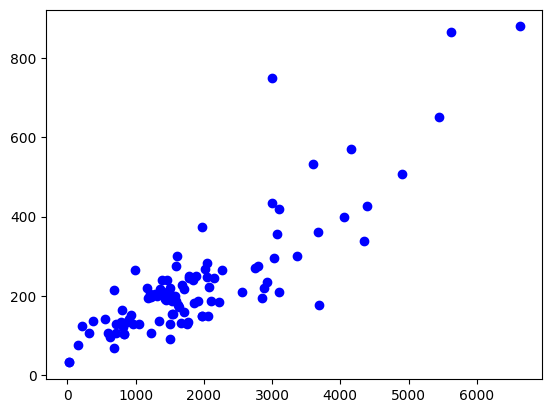

In [30]:
# get x1 and y
x1 = df["taxes"]
y = df["price"]

# plot
plt.figure()
plt.scatter(x1, y, color="blue")

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

See code and results below for the two GLMs.

The coefficients for "new" (x2) are as follows:
- normal GLM: 86.2001
- gamma GLM: -0.0010

Thus, we can conclude that in the normal GLM, there is some correlation between "new" and "price". Whereas the correlation is almost zero for the gamma GLM model.

In [31]:
# normal GLM
normal_model = smf.glm("price ~ taxes + new", data=df, family=sm.families.Gaussian()).fit()

# gamma GLM
gamma_model = smf.glm("price ~ taxes + new", data=df, family=sm.families.Gamma()).fit()

print("Normal GLM:")
print(normal_model.summary())

# Print summary of gamma GLM
print("\nGamma GLM:")
print(gamma_model.summary())

Normal GLM:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          6212.7
Method:                          IRLS   Log-Likelihood:                -577.09
Date:                Tue, 13 Feb 2024   Deviance:                   6.0264e+05
Time:                        14:55:04   Pearson chi2:                 6.03e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9333
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.9651     14.695      2.

/usr/local/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:305: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

As the mean selling price increases from 100 thousand to 500 thousand dollars, the standard deviation for the normal GLM is higher than that of the gamma GLM - as can be seen from the plot. This indicates that the gamma GLM is a better fit for the data.

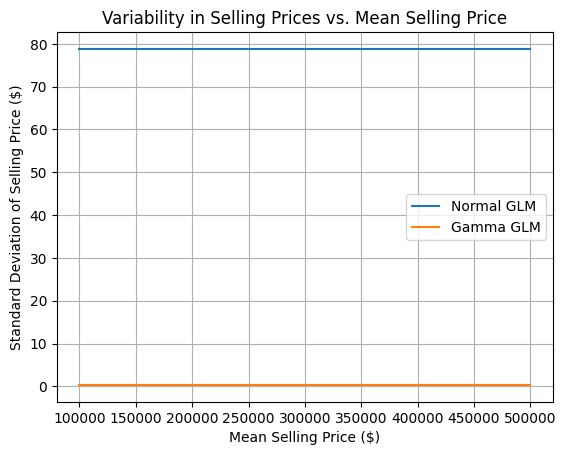

In [32]:
# create vector from 100 thousand to 500 thousand
spvec = np.linspace(100000, 500000, 100)

# create empty vector for data storage
std_normal_vec = [] 
std_gamma_vec = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    np.random.seed(123)

    # run loop to calculate standard deviations for the normal and gamma GLMs
    for sp in spvec:
        
        # Generate data with random noise
        data["selling_price"] = sp + np.random.normal(scale=sp*0.2, size=len(data))
        
        # Fit normal GLM
        normal_model = smf.glm("price ~ taxes + new", data=df, family=sm.families.Gaussian()).fit()
        std_normal_vec.append(normal_model.scale ** 0.5)  # Standard deviation is the square root of scale parameter
        
        # Fit gamma GLM
        gamma_model = smf.glm("price ~ taxes + new", data=df, family=sm.families.Gamma()).fit()
        std_gamma_vec.append(gamma_model.scale ** 0.5)  # Standard deviation is the square root of scale parameter


"""
y_normal_pred = normal_model.predict(df)
y_gamma_pred = gamma_model.predict(df)
plt.figure()
plt.subplots(2)
plt.subplot(211)
plt.plot(df["taxes"],df["price"],'r.',df["taxes"],y_normal_pred,'b.')
plt.ylim([0,1250])
plt.subplot(212)
plt.plot(df["taxes"],df["price"],'r.',df["taxes"],y_gamma_pred,'b.')
plt.ylim([0,1250])
"""

plt.figure()
plt.plot(spvec, std_normal_vec, label="Normal GLM")
plt.plot(spvec, std_gamma_vec, label="Gamma GLM")
plt.xlabel("Mean Selling Price ($)")
plt.ylabel("Standard Deviation of Selling Price ($)")
plt.title("Variability in Selling Prices vs. Mean Selling Price")
plt.legend()
plt.grid(True)
plt.show()

(d) Which model is preferred according to AIC?

Lower AIC is preferred when comparing two models. This is because the model with the lower AIC is expected to provide a better balance between model fit and complexity.

In ths example, we will choose the gamma model since its AIC is lower.

In [33]:
# get AIC
normal_aic = normal_model.aic
gamma_aic = gamma_model.aic
 
# print AIC
print(f"normal aic = {normal_aic:.3f}")
print(f"gamma aic = {gamma_aic:.3f}")

normal aic = 1160.178
gamma aic = 1138.876


## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

`Your answer goes here`

In [34]:
# read data
data = pd.read_csv("Sheep.dat", sep = r"\s+")
data.head()

,sheep,weight,survival
0,1,20.8,0
1,2,23.0,1
2,3,28.0,1
3,4,27.5,1
4,5,26.0,0


In [35]:
# generalized least squares
model = smf.glm("survival ~ weight", data=data, family=sm.families.Binomial()).fit()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # glm model summary
    print(model.summary())

    # p-values
    pvalues = model.pvalues
    print(pvalues)

    # conclusion
    if pvalues[0] < 0.05:
        print("There is sufficient evidence that there is a correlation between the weight and survivability")
    else:
        print("There is insufficient evidence that there is a correlatin between the weight and survivability")

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survival   No. Observations:                 1359
Model:                            GLM   Df Residuals:                     1357
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -645.22
Date:                Tue, 13 Feb 2024   Deviance:                       1290.4
Time:                        14:55:13   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1294
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0298      0.251     -8.103      0.0

(b)  For what weight values do the sheep have more than a 50% chance of survival?

The code and results for the question are given below. For the weight vector created, the min and max weight for 50% chance of survival are 12.1 and 34.1 respectively.

In [36]:
# min and max weight
print("Min weight = %.1f" % data['weight'].min())
print("Max weight = %.1f" % data['weight'].max())

# get X and y
X = data["weight"]
y = data["survival"]
X = sm.add_constant(X)

# fit GLM model
glm_model = smf.glm("survival ~ weight", data=data, family=sm.families.Binomial()).fit()

# create vector between min and max weiht
weights = np.arange(data['weight'].min(), data['weight'].max(), 1)

# create dataframe for use in model
df = pd.DataFrame({'weight': weights})

# predict
prob = glm_model.predict(df)
weights_50perc_plus = weights[prob > 0.5]

# print weights for which survivability > 50%
print(weights_50perc_plus)


Min weight = 3.1
Max weight = 34.2
[12.1 13.1 14.1 15.1 16.1 17.1 18.1 19.1 20.1 21.1 22.1 23.1 24.1 25.1
 26.1 27.1 28.1 29.1 30.1 31.1 32.1 33.1 34.1]


## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

The code and results of the GLM fit is shown below.

The p-value for:
- T: 0.072240 > 0.05
- D: 0.009316 < 0.05

Hence, we can conclude the following:
- For T, we reject the null hypothesis. That is there is significant evidence of the effect of T on Y.
- For D, we cannot reject the null hypothesis. That is there is insufficient evidence of the effect of D on Y.

In [37]:
# read data
data = pd.read_csv("soreThroat.dat", sep = r"\s+")
data.head()

,D,T,Y
0,45,0,0
1,15,0,0
2,40,0,1
3,83,1,1
4,90,1,1


In [38]:
# GLM model
model = smf.glm("Y ~ T + D", data=data, family=sm.families.Binomial()).fit()

# Summary of results
print(model.summary())

# p-values
print("")
print(model.pvalues)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.069
Date:                Tue, 13 Feb 2024   Deviance:                       30.138
Time:                        14:55:22   Pearson chi2:                     37.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4173      1.095     -1.295      0.1

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

Since the p-value of D is higher than 0.05 (0.888), it suggests that the effect of duration of surgery on the probability of having a sore throat may not be statistically significant within each category of T.

In [39]:
# GLM model
model = smf.glm("T ~ D", data=data, family=sm.families.Binomial()).fit()

# Summary of results
print(model.summary())

# p-values
print("")
print(model.pvalues)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      T   No. Observations:                   35
Model:                            GLM   Df Residuals:                       33
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.236
Date:                Tue, 13 Feb 2024   Deviance:                       48.472
Time:                        14:55:26   Pearson chi2:                     35.0
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0005688
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1369      0.659     -0.208      0.8

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”